In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from tqdm import tqdm
import time
import pickle
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import statsmodels.api as sm

from scipy.stats import sem

from lifelines import KaplanMeierFitter

from bl_plots_new import km_plots, km_calculate, stats_plot

In [3]:
from sklearn.metrics import make_scorer, confusion_matrix, roc_auc_score, roc_curve, plot_confusion_matrix, f1_score, recall_score, accuracy_score

from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve

In [4]:
FN = './Prognosis_Results/1_year_prediction_asma.hdf'

metadata = pd.read_excel('/mnt/c/Users/conor/Git_Projects/PHD/metadata_0206.xlsx')

In [5]:
results = pd.read_hdf(FN, key='Data')
results.index = results.index.set_names('Split', level=0);

metadadf = results.index.to_frame().reset_index(drop=True).merge(metadata, on = 'REF')

results.index = pd.MultiIndex.from_frame(metadadf)

In [ ]:
samp = results.sample(10000)

In [ ]:
samp.mean().plot()

In [72]:
pred = (samp.xs('LR_Preds', axis=1, level=0).iloc[:,1] > 0.5).values


duration = samp.reset_index('survival (months)')['survival (months)']
death = (samp.reset_index('DiedvsAlive')['DiedvsAlive'] == 'Died')


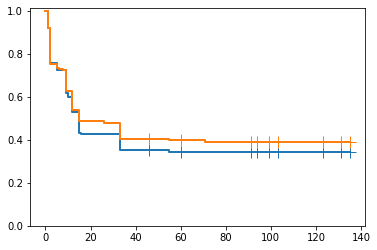

In [73]:
fig, ax = plt.subplots()

sm.SurvfuncRight(duration.loc[pred], death.loc[pred]).plot(ax=ax);
sm.SurvfuncRight(duration.loc[~pred], death.loc[~pred]).plot(ax=ax);

stat, p = sm.duration.survdiff(duration, death, pred)

In [74]:
shuff = duration.values
np.random.shuffle(shuff)

stat, p = sm.duration.survdiff(shuff, death, pred)

In [75]:
print(stat, p)

21.101984253128208 4.354769626790933e-06
